<a href="https://colab.research.google.com/github/Nitesh2206/Data-ANZ/blob/master/anz_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task 1

## 1. Importing Libraries

In [ ]:
pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from shapely.geometry import Point,Polygon
import geopandas as gpd
from geopandas import GeoDataFrame
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
sns.mpl.rc("figure", figsize=(10,6))
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## 2. Data Description and Pre-processing

In [ ]:
df_transaction = pd.read_excel("drive/My Drive/anztask1/ANZ synthesised transaction dataset.xlsx")
df_transaction.shape

(12043, 23)

In [ ]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [ ]:
df_transaction.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


In [ ]:
df_transaction.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,balance,date,gender,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,35.39,2018-08-01,F,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,21.20,2018-08-01,F,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,5.71,2018-08-01,M,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,2117.22,2018-08-01,F,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,17.95,2018-08-01,F,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [ ]:
# Convert extraction to datetime from string
df_transaction['extraction'] = df_transaction['extraction'].apply(pd.to_datetime)

In [ ]:
# Total time period of 3 months.
print(df_transaction['date'].min(),df_transaction['date'].max())

2018-08-01 00:00:00 2018-10-31 00:00:00


In [ ]:
df_transaction['status'].value_counts()

authorized    7717
posted        4326
Name: status, dtype: int64

In [ ]:
df_transaction['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [ ]:
def detect_outlier(column):
    output=[]
    threshold=2
    mean_1 = np.mean(column)
    std_1 =np.std(column)
    
    
    for y in column:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            output.append('Outlier')
        else:
            output.append('In Range')
    return output

def remove_outlier(column):
    output=[]
    threshold=2
    mean_1 = np.mean(column)
    std_1 =np.std(column)
    
    
    for y in column:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) <= threshold:
            output.append(y)
    return output

In [ ]:

# Find Outliers separately for credit and debit transactions
df_transaction['Outlier'] = ''
df_transaction.loc[df_transaction['movement']=='debit','Outlier'] = detect_outlier(df_transaction[df_transaction['movement']=='debit']['amount'])
df_transaction.loc[df_transaction['movement']=='credit','Outlier'] = detect_outlier(df_transaction[df_transaction['movement']=='credit']['amount'])

#df_transaction.to_excel("ANZ synthesised transaction dataset.xlsx",
#             sheet_name='DSynth_Output_100c_3m_v3', index=False)

## 3. Visualizing  various features




### 3.1 Transaction Amount (Without Outliers)

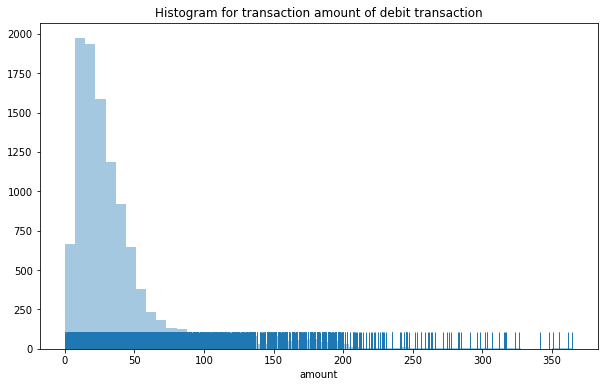

In [ ]:
hist1 = sns.distplot(df_transaction.loc[(df_transaction['movement']=='debit') & (df_transaction['Outlier']=='In Range'),'amount'], kde=False, hist=True, rug=True).set_title('Histogram for transaction amount of debit transaction')

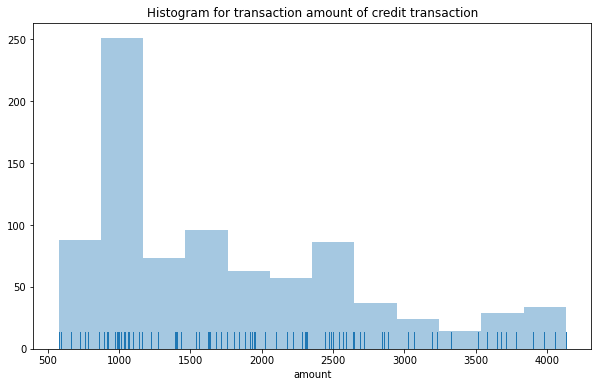

In [ ]:
hist2 = sns.distplot(df_transaction.loc[(df_transaction['movement']=='credit') & (df_transaction['Outlier']=='In Range'),'amount'], kde=False, hist=True, rug=True).set_title('Histogram for transaction amount of credit transaction')

### 3.2 Transaction Volume

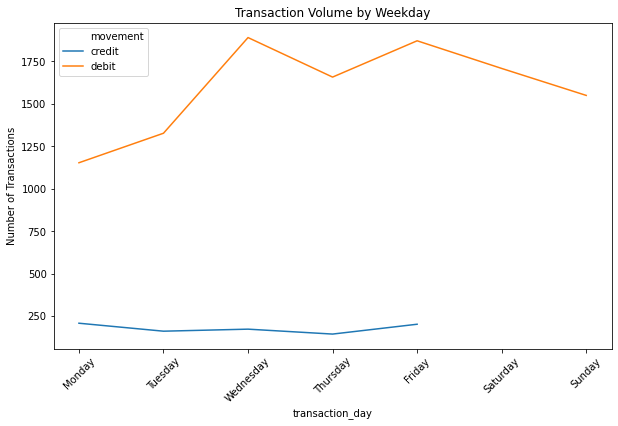

In [ ]:
df_transaction_temp = df_transaction.copy()
df_transaction_temp['transaction_day'] = df_transaction_temp['extraction'].dt.dayofweek
df_transaction_temp = df_transaction_temp.groupby(['transaction_day','movement'])['transaction_id'].agg(lambda x: x.count()).reset_index()
plot = sns.lineplot(x="transaction_day", y="transaction_id",hue="movement", data=df_transaction_temp)
plt.title('Transaction Volume by Weekday')
plt.ylabel('Number of Transactions')

# set the ticks
plt.xticks(np.arange(7),rotation=45)
# rename the ticks
plot.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

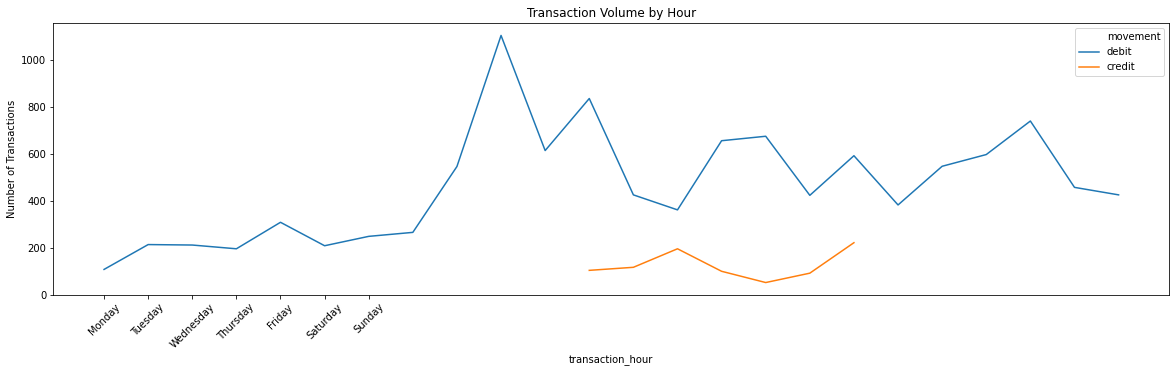

In [ ]:
df_transaction_temp = df_transaction.copy()
df_transaction_temp['transaction_hour'] = df_transaction_temp['extraction'].dt.hour
df_transaction_temp = df_transaction_temp.groupby(['transaction_hour','movement'])['transaction_id'].agg(lambda x: x.count()).reset_index()

plt.figure(figsize=(20,5))
plot = sns.lineplot(x="transaction_hour", y="transaction_id",hue="movement", data=df_transaction_temp)
plt.title('Transaction Volume by Hour')
plot.set(xticks=df_transaction_temp.transaction_hour.values)
plt.ylabel('Number of Transactions')
# set the ticks
plt.xticks(np.arange(7),rotation=45)
# rename the ticks
plot.set_xticklabels(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.show()

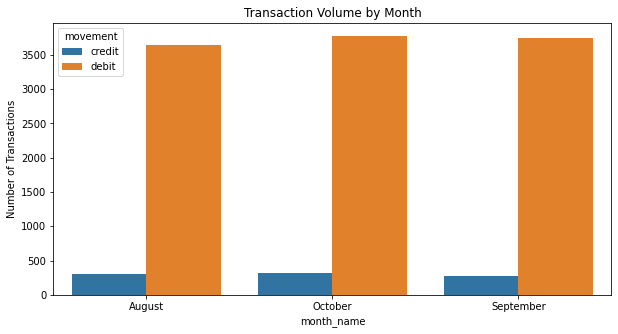

In [ ]:
df_transaction_temp = df_transaction.copy()
df_transaction_temp['month_name'] = df_transaction_temp['extraction'].dt.month_name()
df_transaction_temp = df_transaction_temp.groupby(['month_name','movement'])['transaction_id'].agg(lambda x: x.count()).reset_index()
plt.figure(figsize=(10,5))
plot = sns.barplot(x="month_name", y="transaction_id",hue="movement", data=df_transaction_temp)
plt.title('Transaction Volume by Month')
plt.ylabel('Number of Transactions')
plt.show()

### 3.3 Account Balance

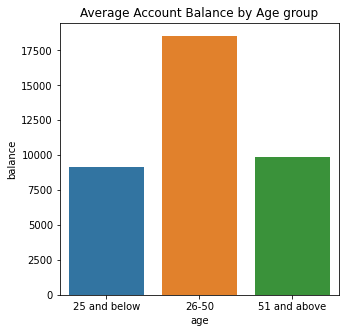

In [ ]:
fig,ax = plt.subplots(figsize=(5,5))
cut = pd.cut(df_transaction.age, [0, 25,50,100],labels=["25 and below","26-50","51 and above"])
df_transaction_temp = df_transaction.groupby(cut)['balance'].agg(lambda x: x.mean()).reset_index()
plt.title('Average Account Balance by Age group')
plt.xlabel('Age Group')
plt.ylabel('Balance')
sns.barplot(x="age",y="balance",data=df_transaction_temp)

### 3.4 Correlation between columns

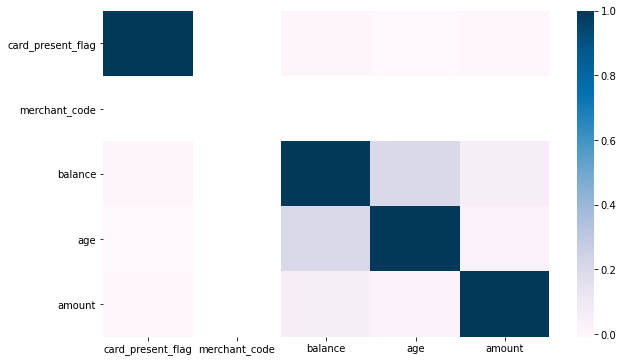

In [ ]:
sns.heatmap(df_transaction.iloc[:,1:].corr(), cmap="PuBu")

Age and Balance show high correlation.

## 4. Working on Location Information

In [ ]:
df_transaction[pd.isna(df_transaction['merchant_id'])].txn_description.value_counts()

PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [ ]:
df_transaction[pd.notna(df_transaction['merchant_id'])].movement.value_counts()

debit    7717
Name: movement, dtype: int64

In [ ]:
# Split into longitude and latitude
df_transaction[['longitude','latitude']] = df_transaction['long_lat'].str.split(expand=True)
df_transaction[['merchant_longitude','merchant_latitude']] = df_transaction['merchant_long_lat'].str.split(expand=True) 

In [ ]:
# 123 rows with wrong lat and long --> CUS-1617121891	
df_transaction[df_transaction['latitude']=='-573.00'].shape

(123, 28)

In [ ]:
# Find the bounding box for the location attributes
df_wrong_loc = df_transaction[df_transaction['account']!='ACC-2901672282']
BBox = ((df_wrong_loc.longitude.min(), df_wrong_loc.longitude.max(),      
         df_wrong_loc.latitude.min(), df_wrong_loc.latitude.max()))
BBox

('114.62', '153.41', '-12.37', '-42.88')

In [ ]:
# Get the shape file for Australia
aus_map=gpd.read_file('drive/My Drive/anztask1/Australia_boundary.shp')

In [ ]:
df_transaction['latitude'] = df_transaction['latitude'].astype(float)
df_transaction['longitude'] = df_transaction['longitude'].astype(float)
df_transaction['merchant_latitude'] = df_transaction['merchant_latitude'].astype(float)
df_transaction['merchant_longitude'] = df_transaction['merchant_longitude'].astype(float)
crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(df_transaction['longitude'], df_transaction['latitude'])]
merchant_geometry = [Point(xy) for xy in zip(df_transaction['merchant_longitude'], df_transaction['merchant_latitude'])]

In [ ]:
geo_df = gpd.GeoDataFrame(df_transaction.copy(),
                          crs=crs,
                          geometry=geometry)
merchant_geo_df = gpd.GeoDataFrame(df_transaction.copy(),
                          crs=crs,
                          geometry=merchant_geometry)

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


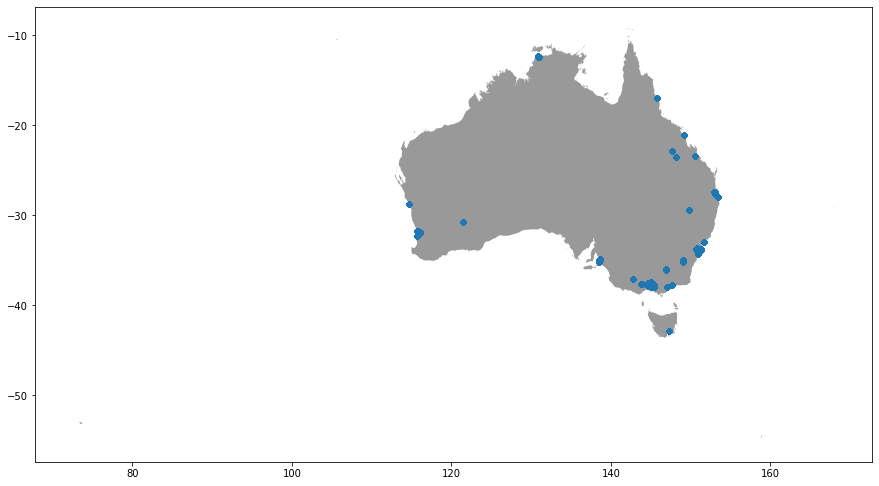

In [ ]:
# Plot the coordinates for customer longitude and latitude.
fig,ax = plt.subplots(figsize=(15,15))
aus_map.plot(ax=ax, alpha=0.4, color="black")
geo_df[geo_df['latitude']!=-573.00].plot(ax=ax,markersize=20) #exclude invalid coordinates

In [ ]:
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [ ]:
df_transaction.loc[pd.notna(df_transaction['merchant_id']), 'distance'] = df_transaction[pd.notna(df_transaction['merchant_id'])].apply(lambda x : haversine_vectorize(x['longitude'], x['latitude'], x['merchant_longitude'], x['merchant_latitude']), axis=1)

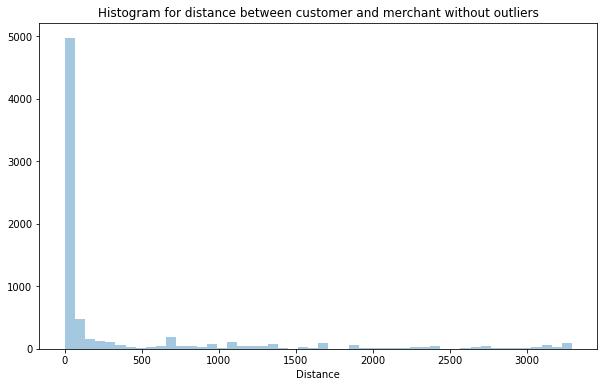

In [ ]:
hist1 = sns.distplot(remove_outlier(df_transaction.loc[pd.notna(df_transaction['merchant_id']), 'distance']), kde=False, hist=True)
plt.title('Histogram for distance between customer and merchant without outliers')
plt.xlabel('Distance')
plt.show()

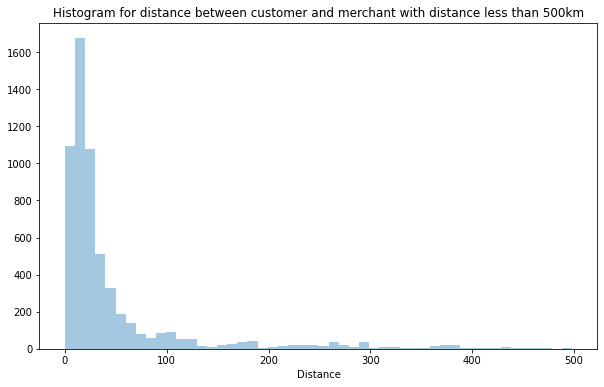

In [ ]:
hist1 = sns.distplot(df_transaction.loc[(pd.notna(df_transaction['merchant_id'])) & (df_transaction['distance']<500), 'distance'], kde=False, hist=True)
plt.title('Histogram for distance between customer and merchant with distance less than 500km')
plt.xlabel('Distance')
plt.show()

# Task 2

## 5. Calculate Annual Salary

In [ ]:
df_transaction_temp = df_transaction[df_transaction["txn_description"]=="PAY/SALARY"].groupby(['customer_id','age','gender','longitude','latitude'])['amount'].agg(lambda x: x.sum()).reset_index()
df_transaction_temp.rename(columns={"amount": "salary"},inplace=True)
df_transaction_temp["salary"] = (df_transaction_temp["salary"]/92)*365 # Annual salary
df_transaction_temp.head()

,customer_id,age,gender,longitude,latitude,salary
0,CUS-1005756958,53,F,153.03,-27.51,50053.045109
1,CUS-1117979751,21,M,115.81,-31.82,99385.334239
2,CUS-1140341822,28,M,144.97,-37.42,45621.270652
3,CUS-1147642491,34,F,151.04,-33.77,88266.799457
4,CUS-1196156254,34,F,138.52,-35.01,108413.371196


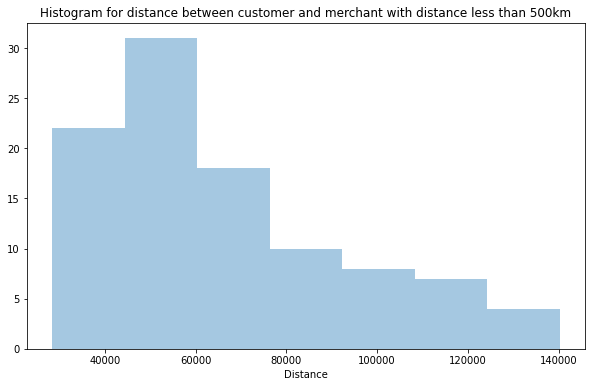

In [ ]:
hist1 = sns.distplot(df_transaction_temp["salary"], kde=False, hist=True)
plt.title('Histogram for distance between customer and merchant with distance less than 500km')
plt.xlabel('Distance')
plt.show()

## 6. Prepare data for Regression models

#### Add Additional Features

In [ ]:
df_transaction_temp["age_25_and_below"] = df_transaction_temp["age"].apply(lambda x : 1 if x <= 25 else 0)
df_transaction_temp["age_26_50"] = df_transaction_temp["age"].apply(lambda x : 1 if (x > 25 and x<= 50) else 0)
df_transaction_temp["age_51_and_above"] = df_transaction_temp["age"].apply(lambda x : 1 if x > 50 else 0)

In [ ]:
# Add columns by aggregating important numeric columns
def f(x):
    d = {}
    d['max_amount'] = x['amount'].max()
    d['mean_amount'] = x['amount'].mean()
    d['max_balance'] = x['balance'].max()
    d['mean_balance'] = x['balance'].mean()
    d['total_transactions'] = x['transaction_id'].count()
    d['customer_state'] = x['merchant_state'].value_counts().index[0]

    return pd.Series(d, index=['max_amount', 'mean_amount', 'max_balance', 'mean_balance','total_transactions', 'customer_state'])

df_transaction_temp = pd.merge(left=df_transaction_temp, right=df_transaction.groupby(['customer_id']).apply(f), left_on='customer_id', right_on='customer_id')
    

In [ ]:
df_transaction_temp = pd.get_dummies(df_transaction_temp.iloc[:,1:])# convert categorical variables

In [ ]:
# final dataset
df_transaction_temp.head()

,age,longitude,latitude,salary,age_25_and_below,age_26_50,age_51_and_above,max_amount,mean_amount,max_balance,mean_balance,total_transactions,gender_F,gender_M,customer_state_NSW,customer_state_NT,customer_state_QLD,customer_state_SA,customer_state_VIC,customer_state_WA
0,53,153.03,-27.51,50053.045109,0,0,1,970.47,222.862603,9310.03,2275.852055,73,1,0,0,0,1,0,0,0
1,21,115.81,-31.82,99385.334239,1,0,0,3578.65,339.843700,18516.40,9829.929000,100,0,1,0,0,0,0,0,1
2,28,144.97,-37.42,45621.270652,0,1,0,1916.51,212.632500,7658.48,5699.212250,80,0,1,0,0,0,0,1,0
3,34,151.04,-33.77,88266.799457,0,1,0,1711.39,245.600169,15532.46,9032.841186,118,1,0,1,0,0,0,0,0
4,34,138.52,-35.01,108413.371196,0,1,0,3903.73,147.145796,31350.50,22272.433755,245,1,0,0,0,0,1,0,0


In [ ]:
#pplot = sns.pairplot(df_transaction_temp)
#plt.show()

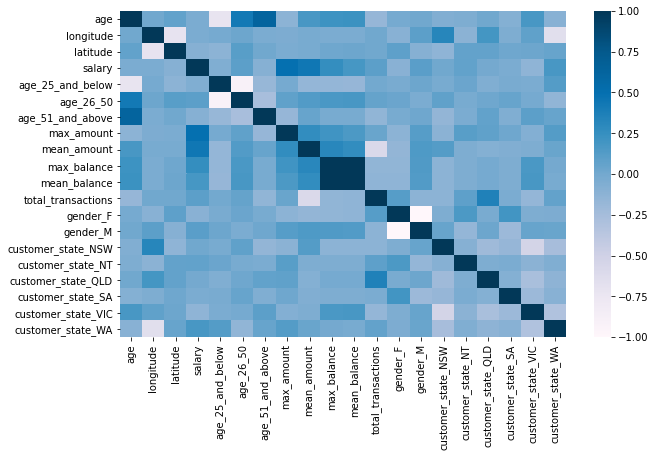

In [ ]:
sns.heatmap(df_transaction_temp.corr(), cmap="PuBu")
plt.show()

#### Divide data into training and test sets

In [ ]:
X = df_transaction_temp.loc[:, (df_transaction_temp.columns != 'salary')].copy()
Y = df_transaction_temp.loc[:, (df_transaction_temp.columns == 'salary')].copy()

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.05, random_state=0)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((95, 19), (5, 19), (95, 1), (5, 1))

## 7. Linear Regression

In [ ]:
lr = LinearRegression()  
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
#rmse
np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

10432.339198706657

## 8.Decision Tree Regressor

In [ ]:
dtree = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10,random_state=0)
dtree = dtree.fit(X_train, Y_train)

In [ ]:
Y_pred = dtree.predict(X_test)

In [ ]:
np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

11297.282540049664

Hyperparameter tuning for getting least mse on training set 

In [ ]:
param_grid = {"criterion": ["mse"],
              "min_samples_split": [5, 10, 20, 40],
              "max_depth": [2,4, 6, 8],
              "min_samples_leaf": [10,20,40,100],
              "max_leaf_nodes": [5,10, 20, 100],
              }
grid_cv_dtree = GridSearchCV(dtree, param_grid, cv=5)

grid_cv_dtree = grid_cv_dtree.fit(X_train, Y_train)

In [ ]:
grid_cv_dtree.best_estimator_ # best estimator by using GridSearchCV

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=10, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
Y_pred = grid_cv_dtree.best_estimator_.predict(X_test)
np.sqrt(metrics.mean_squared_error(Y_test, Y_pred))

15184.67757974995